In [1]:
import numpy as np
from scipy.fftpack import fft
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline

from time import perf_counter

In [2]:
#Code with For Loop
def evalfreqfft(time_sec, vibr):
    datalength_fft = len(time_sec)
    datalengthby2 = int(datalength_fft/2)
    timeavgcalc = np.array([], dtype = float64)
    for i in np.arange(1,datalength_fft):
        timeavgcalc = (np.append(timeavgcalc,(time_sec[i]-time_sec[i-1])))
    sigint_avg = np.mean(timeavgcalc)
    siginf = 1/(datalength_fft*sigint_avg)
    freqhztemp = np.arange(0,datalength_fft,dtype = float64)
    freqhz = freqhztemp*siginf
    freqhz = freqhz[0:datalengthby2]
    vibr_fft = np.abs(fft(vibr,axis = -1))
    vibr_fft = ((vibr_fft[0:datalengthby2])/datalength_fft)*2
    return freqhz,vibr_fft, max(freqhz)*2

In [3]:
#Vectorised Code
def evalfreqfftvect(time_sec, vibr):
    datalength_fft = len(time_sec)
    datalengthby2 = int(datalength_fft/2)
    timeavgcalc = np.array([], dtype = float64)
    time_sec_i = np.delete(time_sec,len(time_sec)-1)
    time_sec_i_1 = np.delete(time_sec,0)
    timeavgcalc = time_sec_i_1- time_sec_i
    sigint_avg = np.mean(timeavgcalc)
    siginf = 1/(datalength_fft*sigint_avg)
    freqhztemp = np.arange(0,datalength_fft,dtype = float64)
    freqhz = freqhztemp*siginf
    freqhz = freqhz[0:datalengthby2]
    vibr_fft = np.abs(fft(vibr,axis = -1))
    vibr_fft = ((vibr_fft[0:datalengthby2])/datalength_fft)*2
    return freqhz,vibr_fft, max(freqhz)*2

In [4]:
#make a dummy time signal
time_sec = np.arange(0,1,0.00001)
len(time_sec)

100000

In [5]:
#make a dummy vibration signal
dummy_signal_1 = 5*np.sin(2*np.pi*500*time_sec)
dummy_signal_2 = 0.5*np.sin(2*np.pi*1000*time_sec)
dummy_signal_1_2 = dummy_signal_1 + dummy_signal_2

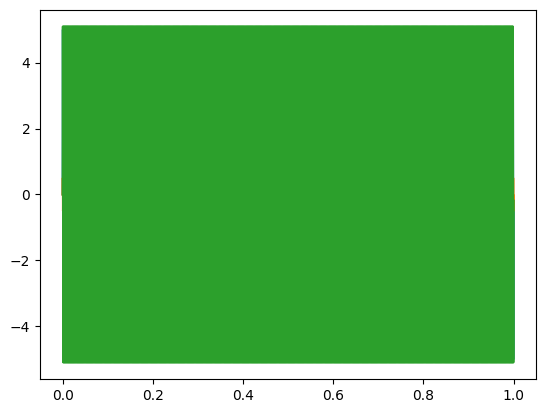

In [6]:
#plot the three dummy signals
plt.plot(time_sec,dummy_signal_1)
plt.plot(time_sec,dummy_signal_2)
plt.plot(time_sec,dummy_signal_1_2)
plt.show()

In [7]:
#Calculate the FFT of dummy signal with For Loop
start = perf_counter()
dummy_signal_freq_hz_f, dummy_signal_fft_f, dummy_signal_max_f = evalfreqfft(time_sec, dummy_signal_1_2)
duration = perf_counter()-start
print("For Loop took", duration, "seconds")

For Loop took 2.4247281000000385 seconds


In [8]:
#Calculate the FFT of dummy signal with Vectorised Code
start2 = perf_counter()
dummy_signal_freq_hz_v, dummy_signal_fft_v, dummy_signal_max_v = evalfreqfftvect(time_sec, dummy_signal_1_2)
duration2 = perf_counter()-start2
print("Vectorised Code took", duration2, "seconds")

Vectorised Code took 0.01642960000003768 seconds


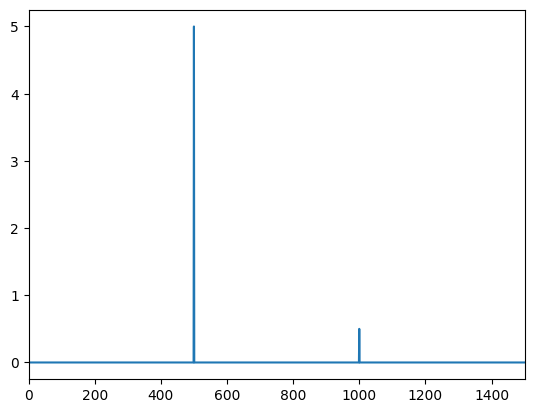

In [9]:
plt.plot(dummy_signal_freq_hz_f, dummy_signal_fft_f)
plt.xlim(0,1500)
plt.show()

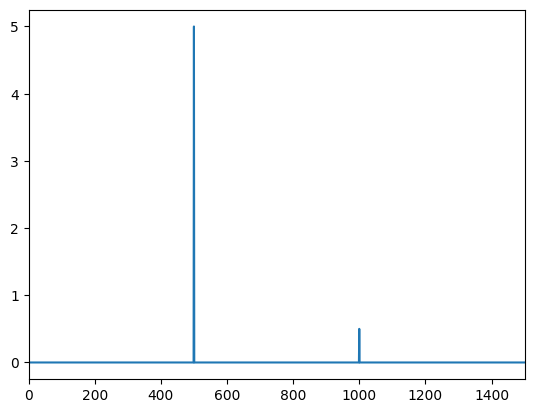

In [10]:
plt.plot(dummy_signal_freq_hz_v, dummy_signal_fft_v)
plt.xlim(0,1500)
plt.show()

In [11]:
dummy_signal_freq_hz_f == dummy_signal_freq_hz_v

array([ True,  True,  True, ...,  True,  True,  True])

In [12]:
dummy_signal_fft_f == dummy_signal_fft_v

array([ True,  True,  True, ...,  True,  True,  True])

In [13]:
#Implementing Butterworth BandPass Filter

def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5*fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype = 'band')
    return b, a
def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order = order)
    y = lfilter(b, a, data)
    return y,b,a

In [14]:
dummy_signal_1_2_filt,b,a = butter_bandpass_filter(dummy_signal_1_2, 900,1100,dummy_signal_max_v ,order=4)

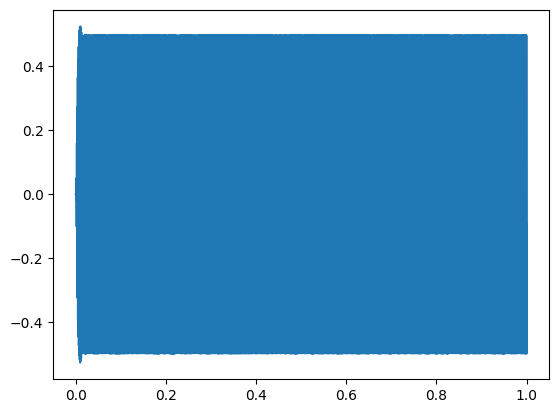

In [15]:
plt.plot(time_sec, dummy_signal_1_2_filt)
plt.show()

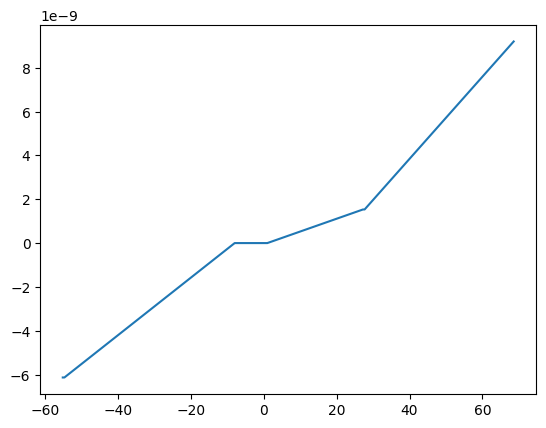

In [16]:
plt.plot(sort(a),sort(b))
plt.show()

In [17]:
sort(b)

array([-6.13347074e-09, -6.13347074e-09,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.53336769e-09,  1.53336769e-09,
        9.20020612e-09])

In [18]:
dummy_signal_1_2_filt 

array([ 0.00000000e+00,  2.88961692e-10,  2.87520262e-09, ...,
       -1.55400423e-01, -1.25352169e-01, -9.48115299e-02])

In [19]:
dummy_signal_filt_freq_hz_v, dummy_signal_filt_fft_v, dummy_signal_filt_max_v = evalfreqfftvect(time_sec, dummy_signal_1_2_filt )


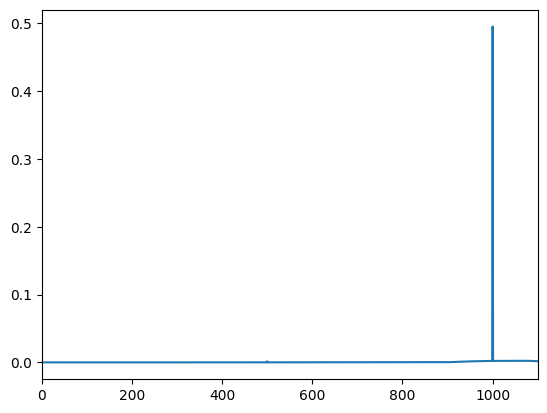

In [20]:
plt.plot(dummy_signal_filt_freq_hz_v, dummy_signal_filt_fft_v)
plt.xlim(0,1100)
plt.show()

In [ ]:
def eval_rms_ampl(time_sec, speed_rpm, vibr):
    datalength = len(speed_rpm)
    crankanglecum = np.array([0], dtype = float64)
    for i in np.arange(1, datalength):
        crankanglecum = np.append(crankanglecum, (crankanglecum[i-1]+(((speed_rpm[i-1]/2)/60)*360*(time_sec[i]-time_sec[i-1]))))
    cycle = np.array([1], dtype = int)
    crankanglerel = np.array([0], dtype = float64)
    for i in np.arange(1,datalength):
        cycle = (np.append(cycle, np.floor(((crankanglecum[i]/720.0))+1)))
        crankanglerel = np.append(crankanglerel, (crankanglecum[i]-(cycle[i]-1)*720))
    maxcy = max(cycle)
    alldata = np.stack((cycle, time_sec, speed_rpm, vibr), axis = 1)
    e, inds = np.unique(alldata[:,0], return_index=True)
    alldata_cycle = np.split(alldata, inds)[1:]
    speedindex = np.array([], dtype = float64)
    rms_vibr = np.array([], dtype = float64)
    ampl_vibr = np.array([], dtype = float64)
    time_interval = np.array([], dtype = float64)
    freqhz3d = np.array([], dtype = float64)
    vibrfft3d = np.array([], dtype = float64)
    fs = = np.array([], dtype = float64)
    for i in np.arange(0,maxcy):
        y = int(i)
        speedindex = (np.append(speedindex,(np.mean(alldata_cycle[y][:,2]))))
        rms_vibr = (np.append(rms_vibr,(np.sqrt(np.mean(np.square((alldata_cycle[y][:,3])))))))
        ampl_vibr = (np.append(ampl_vibr,((max(((alldata_cycle[y][:3])))-min(((alldata_cycle[y][:,3]))))/2)))
        freqhztemp,vibrtemp,fstemp = eval_freqfft(alldata_cycle[y][:,1],alldata_cycle[y][:,3])
        freqhz3d = np.hstack((freqhz3d,freqhztemp))
        vibrfft3d = np.hstack((vibrfft3d,vibrtemp))
    freqvibr3d = np.transpose(np.vstack((freqhz3d, vibrfft3d)))
    freqvibr3dspl = np.split(freqvibr3d, np.argwhere(freqvibr3d[:,0] == 0.0).flatten()[1:])
    freqvibr3d_freq_interp = np.array([], dtype = float64)
    freqvibr3d_vibr_interp = np.array([], dtype = float64)
    for y in np.arange(0,int(maxcy)):
        funcakimainterp = interpolate.Akima1DInterpolator(freqvibr3dspl[y][:,0], freqvbr3dspl[y][:1])
        freqvibr3d_freq_interptemp = np.arange(0,(ceil(max(freqvibr3dspl[int{maxcy}-1][:,0]))+10),10)
        freqvibr3d_vibr_interptemp = funcakimainterp(freqvibr3d_freq_interptemp)
        freqvibr3d_freq_interp = np.append(freqvibr3d_freq_interp, freqvibr3d_freq_interptemp)
        freqvibr3d_vibr_interp = np.append(freqvibr3d_vibr_interp, freqvibr3d_vibr_interptemp)
    freqvibr3dv2 = np.transpose(np.vstack((freqvibr3d_freq_interp, freqvibr3d_vibr_interp)))
    freqvibr3dsplv2 = np.split(freqvibr3dv2, np.argwhere(freqvibr3dv2[:,0] == 0.0).flatten()[1:])
    temponesval = int(len(freqvibr3dsplv2[0]))
    freqvibr3dsplv2x = np.array([], dtype = float64)
    freqvibr3dsplv2y = np.array([], dtype = float64)
    freqvibr3dsplv2z = np.array([], dtype = float64)
    for i in arange(0,int(max(cycle))):
        freqvibr3dsplv2x = np.vstack((freqvibr3dsplv2x,freqvibr3dsplv2x[i][:,0]))
        freqvibr3dsplv2y = np.vstack((freqvibr3dsplv2y,speedindex[i]*np.ones(temponesval)))
        freqvibr3dsplv2z = np.vstack((freqvibr3dsplv2z,freqvibr3dsplv2[i],[:,1]))
    freqvibr3dsplv2x = np.delete(freqvibr3dsplv2x,0,0)
    freqvibr3dsplv2y = np.delete(freqvibr3dsplv2y,0,0)
    freqvibr3dsplv2z = np.delete(freqvibr3dsplv2z,0,0)
    return speedindex,rms_vibr,ampl_vibr,cycle,freqvibr3dsplv2x,freqvibr3dsplv2y,freqvibr3dsplv2z      